In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 16 10:09:15 2024

@author: yirangong
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Jul 15 11:32:02 2022

@author: narfa
"""

import scipy.io as sio
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
import sys
import random
import json
from itertools import chain

# Define the jointlyGreedy function
def jointlyGreedy(mmap, start_1, start_2):
    distance_copy = mmap.distance.copy()
    distance_copy = chain.from_iterable(zip(*distance_copy))
    dist_greedy1 = 0  # the current distance sum of greedy path
    greedy_index1 = [start_1]  # greedy path starting index
    dist_greedy2 = 0
    greedy_index2 = [start_2]
    remainingBudget = 300

    i = 0  # current connected city number P1
    j = 0  # current connected city number P2

    matrix_copy = mmap.distance.copy()

    distances1 = matrix_copy[start_1]
    distances2 = matrix_copy[start_2]

    while i + j <= mmap.N - 2:
        n_greedy1 = 0
        n_greedy2 = 0

        # first do for player 1 if player 1 has not used all their moves
        tempMatrix = matrix_copy
        tempMatrix[:, greedy_index2[-1]] = 0

        dist_list1 = tempMatrix[greedy_index1[i]]  # choose the related column/row
        try:
            dist1 = np.amin(dist_list1[dist_list1 != 0])  # the smallest non-zero distance
        except:
            dist1 = 10000

        tempMatrix = matrix_copy
        tempMatrix[:, greedy_index1[-1]] = 0
        dist_list2 = matrix_copy[greedy_index2[j]]  # choose the related column/row
        try:
            dist2 = np.amin(dist_list2[dist_list2 != 0])
        except:
            dist2 = 10000

        if dist1 < dist2:
            if dist1 > remainingBudget:  # check this line... should it be
                break
                print("PlaceHolder")
            else:
                if dist_greedy1 + dist_greedy2 + dist1 <= mmap.total * 2:
                    dist_greedy1 = dist_greedy1 + dist1  # update current distance sum of greedy path
                    index_np1 = np.where(dist_list1 == dist1)  # find the chosen city index
                    if len(index_np1[0]) > 1:
                        index_np1 = random.choice(index_np1)

                    matrix_copy[:, greedy_index1[-1]] = 0  # cannot choose one city twice
                    matrix_copy[greedy_index1[-1], :] = 0

                    i = i + 1
                    n_greedy1 = i
                    greedy_index1 = np.append(greedy_index1, index_np1[0])
                    remainingBudget = remainingBudget - dist1
        else:
            if dist2 > remainingBudget:  # check this line... should it be
                break
                print("PlaceHolder")
            else:
                if dist_greedy1 + dist_greedy2 + dist2 <= mmap.total * 2:
                    dist_greedy2 = dist_greedy2 + dist2  # update current distance sum of greedy path
                    index_np2 = np.where(dist_list2 == dist2)  # find the chosen city index
                    if len(index_np2[0]) > 1:
                        index_np2 = random.choice(index_np2)
                    matrix_copy[:, greedy_index2[-1]] = 0  # cannot choose one city twice
                    matrix_copy[greedy_index2[-1], :] = 0

                    j = j + 1
                    n_greedy2 = j
                    greedy_index2 = np.append(greedy_index2, index_np2[0])
                    remainingBudget = remainingBudget - dist2

    return n_greedy1, greedy_index1, n_greedy2, greedy_index2, remainingBudget


# Define the PlotJointlyGreedy function
def PlotJointlyGreedy(greedy_index1, greedy_index2, basic_all, m):
    P1xJG = []
    P1yJG = []
    for counter in range(len(greedy_index1)):
        P1xJG.append((basic_all[m].get("x"))[greedy_index1[counter]])
        P1yJG.append((basic_all[m].get("y"))[greedy_index1[counter]])
    # print("P1xJG:", P1xJG)
    # print("P1yJG:", P1yJG)

    P2xJG = []
    P2yJG = []
    for counter in range(len(greedy_index2)):
        P2xJG.append((basic_all[m].get("x"))[greedy_index2[counter]])
        P2yJG.append((basic_all[m].get("y"))[greedy_index2[counter]])
    # print("P2xJG:", P2xJG)
    # print("P2yJG:", P2yJG)

    realPathWeight = 4
    citySize = 20
    fig = plt.figure(figsize=(7, 7))
    ax1 = plt.subplot(1, 1, 1)

    ax1.scatter(basic_all[m].get("x"), basic_all[m].get("y"), s=citySize, c='gray')
    ax1.axis('off')
    circle1 = plt.Circle((0, 0), 250, color='k', fill=False)
    ax1.add_patch(circle1)
    ax1.plot(P1xJG, P1yJG, 'ro', linestyle="--", linewidth=realPathWeight)
    ax1.plot(P2xJG, P2yJG, 'bo', linestyle="--", linewidth=realPathWeight)

    # Add annotation for the first point in greedy_index1
    if P1xJG and P1yJG:  # Ensure there is at least one point
        first_point_x = P1xJG[0]
        first_point_y = P1yJG[0]
        ax1.text(first_point_x + 5, first_point_y + 5, '1', fontsize=12, color='red')

    # Add annotation for the first point in greedy_index2
    if P2xJG and P2yJG:  # Ensure there is at least one point
        first_point_x = P2xJG[0]
        first_point_y = P2yJG[0]
        ax1.text(first_point_x + 5, first_point_y + 5, '2', fontsize=12, color='blue')

    # Count the number of city each player collected 
    total_cities_count = len(P1xJG) + len(P2xJG)
    print("Total number of cities caught: ", total_cities_count)

    plt.title(f"Jointly Greedy Path for Map {m} \n Total cities collected: {total_cities_count}")
    
    plt.show()


# Load map data
LoadPath = '/Users/yirangong/Projects/RoadConstruction/MapGeneration/DataPool/'
LoadSection = '/Exp1'

with open(LoadPath + LoadSection + '/basic_map_1', 'r') as file:
    basic_all = json.load(file)

with open(LoadPath + LoadSection + '/basic_summary_1', 'r') as file:
    summary = json.load(file)
    diff_list = summary[0]
    optimal_list = summary[1]
    greedy1_list = summary[2]
    greedy2_list = summary[3]
    optimal_number = summary[4]
    optimalTurn_list = summary[7]
    OptPathAll = summary[13]
    OptTurnsAll = summary[14]
    delta_contribution = summary[15]
    contribution_p1 = summary[16]
    contribution_p2 = summary[17]



Total number of cities caught:  10


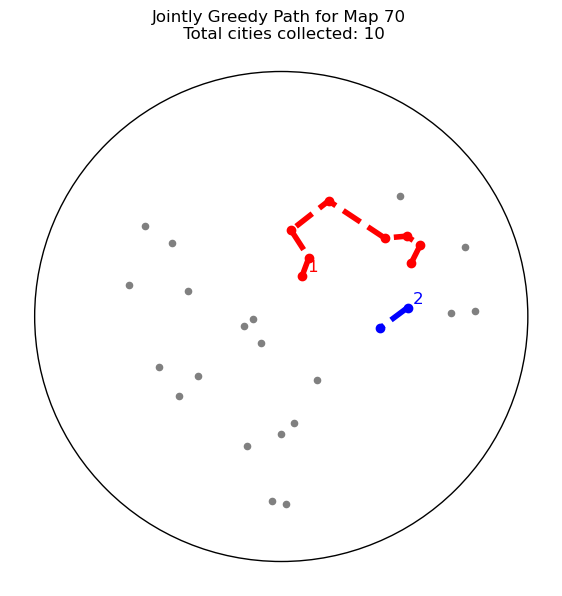

Total number of cities caught:  10


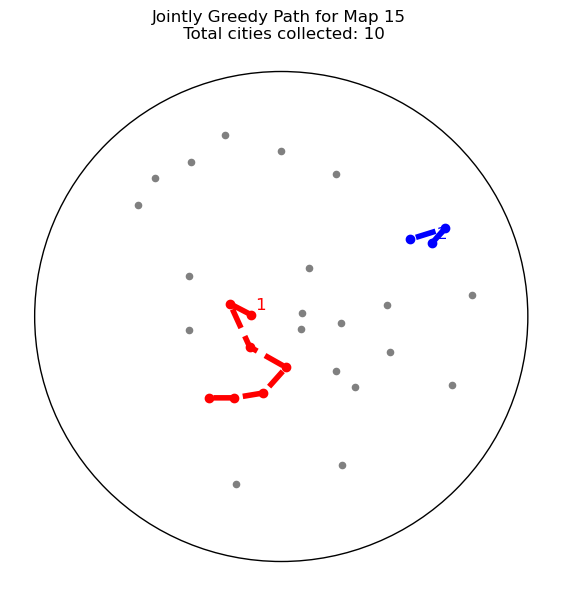

Total number of cities caught:  9


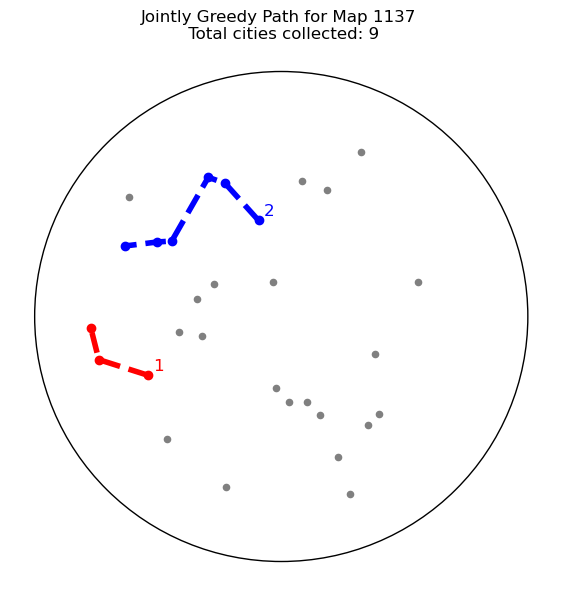

Total number of cities caught:  8


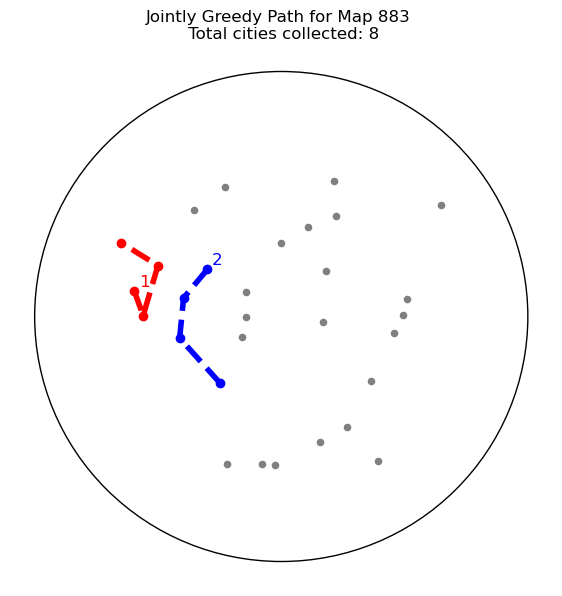

Total number of cities caught:  12


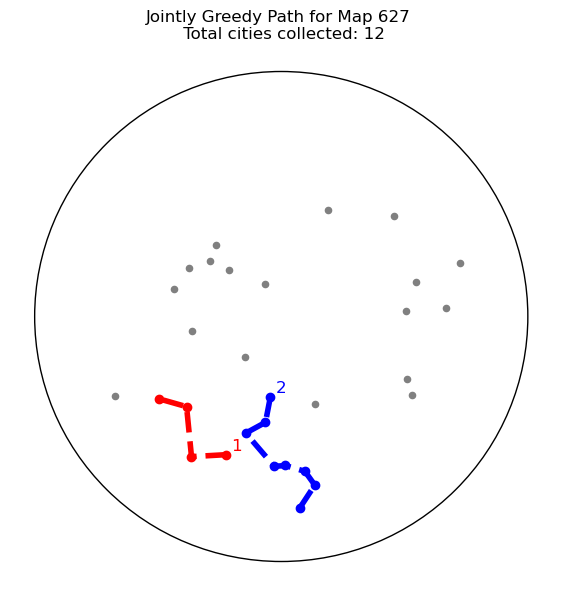

Total number of cities caught:  9


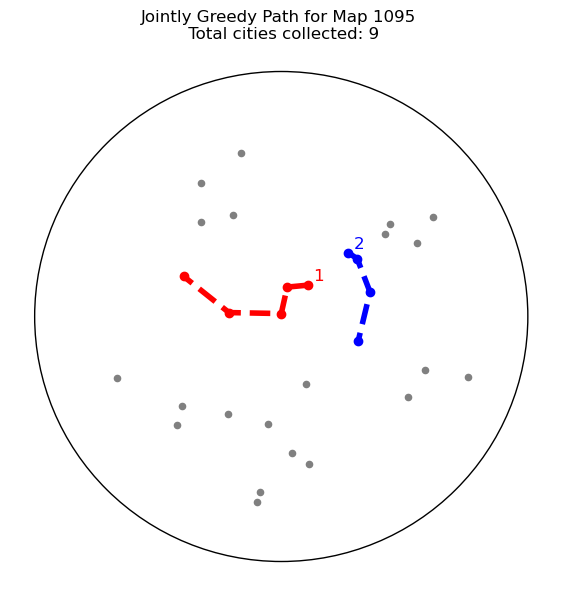

Total number of cities caught:  8


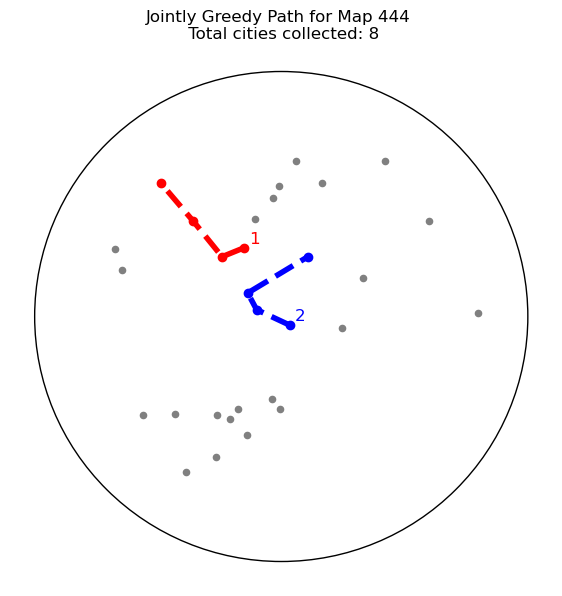

Total number of cities caught:  9


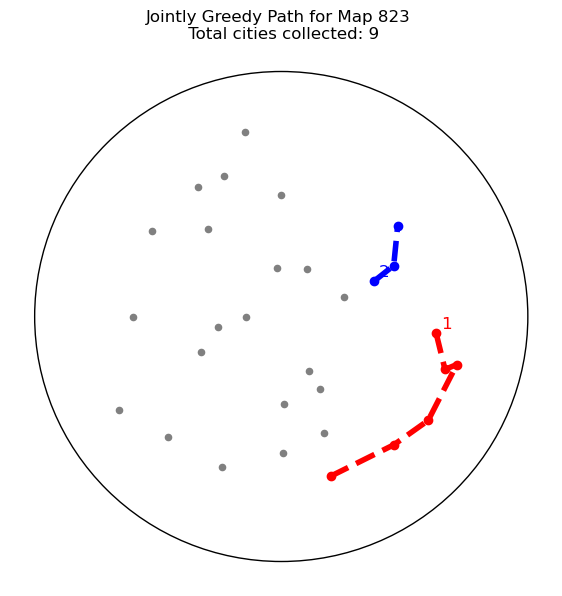

Total number of cities caught:  12


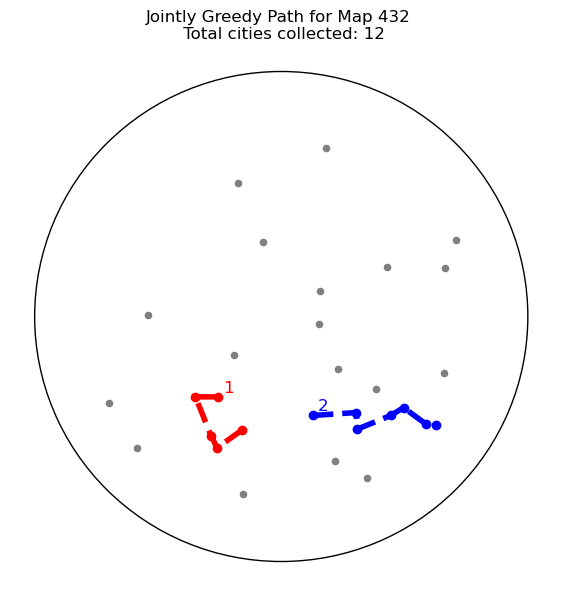

Total number of cities caught:  12


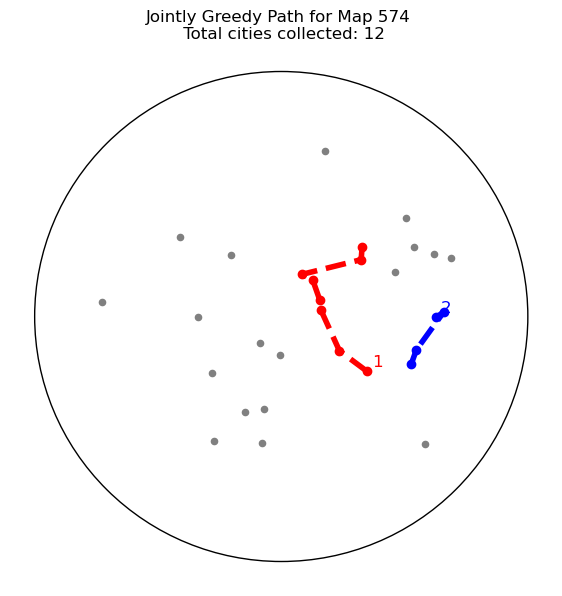

Total number of cities caught:  8


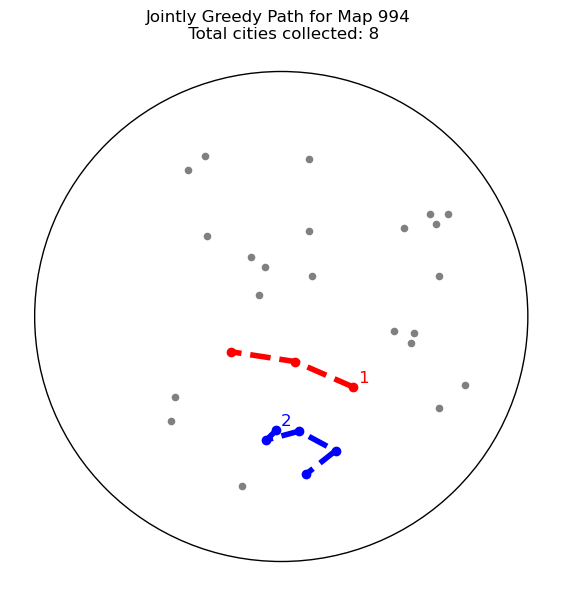

Total number of cities caught:  10


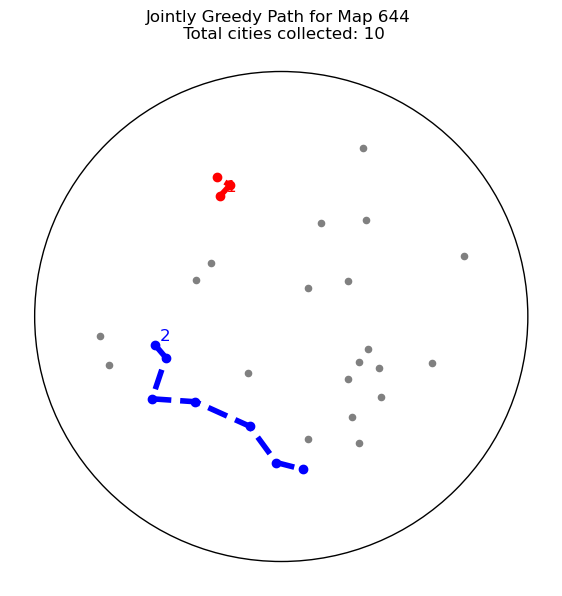

Total number of cities caught:  9


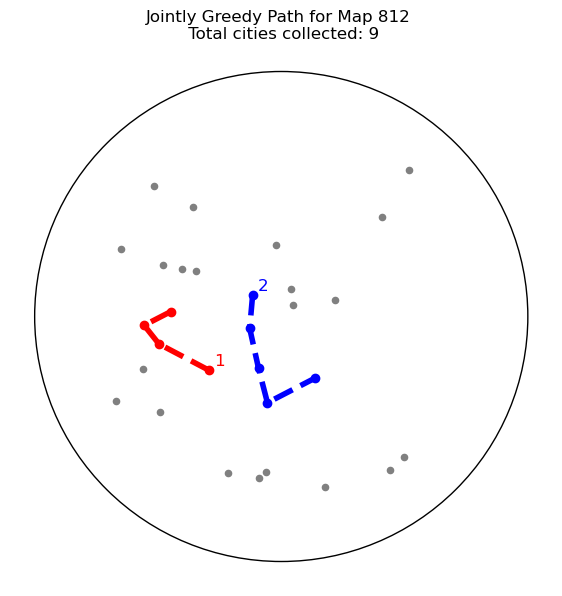

Total number of cities caught:  9


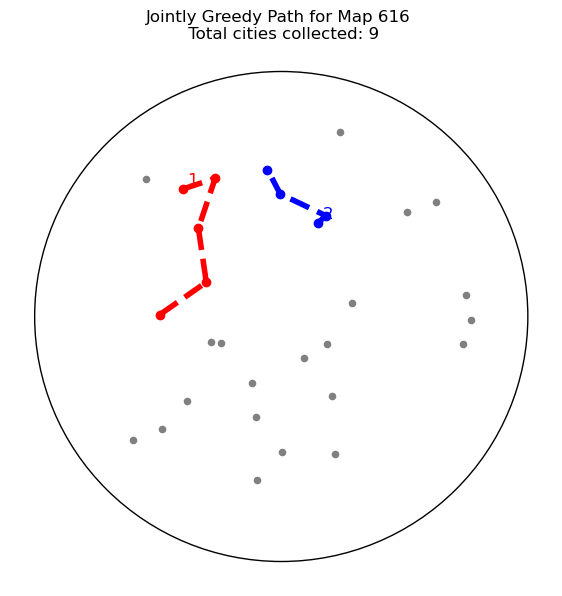

Total number of cities caught:  10


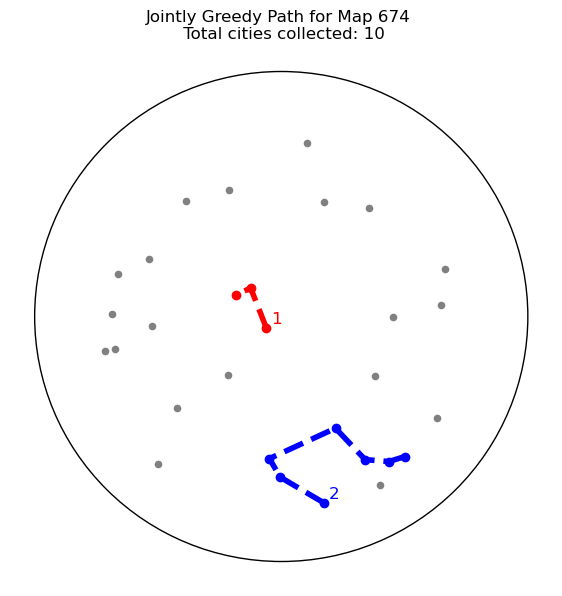

Total number of cities caught:  8


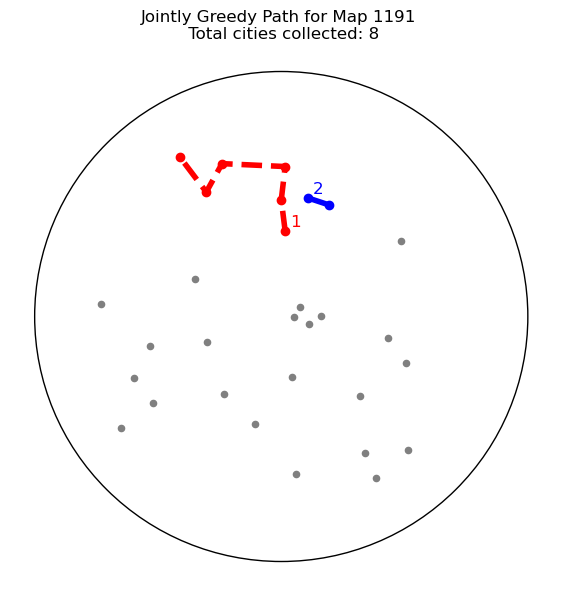

Total number of cities caught:  9


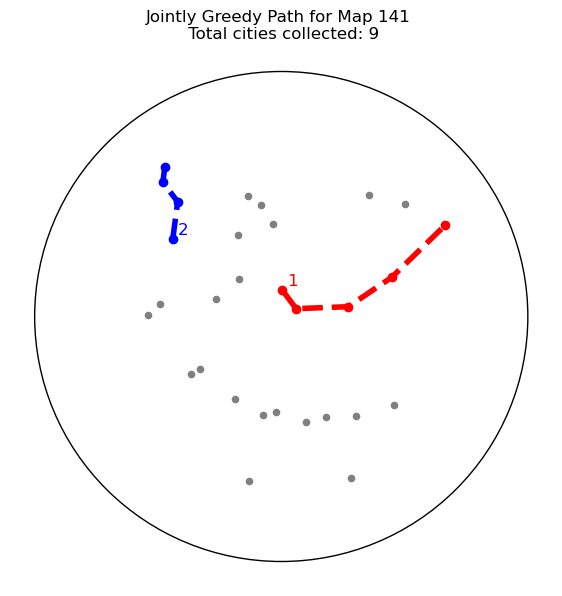

Total number of cities caught:  10


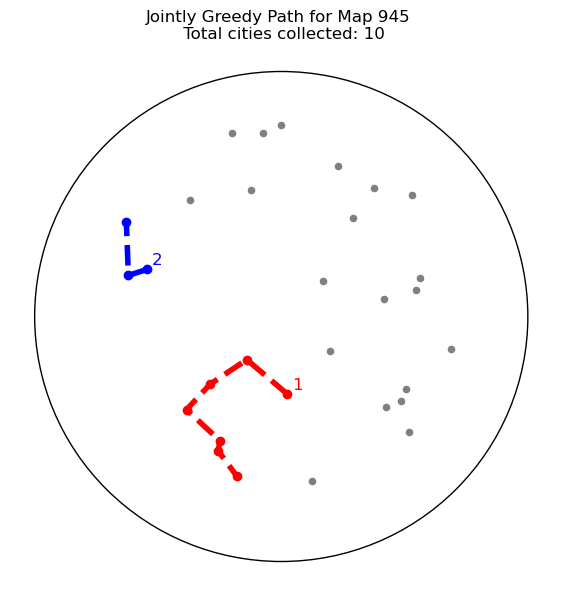

Total number of cities caught:  9


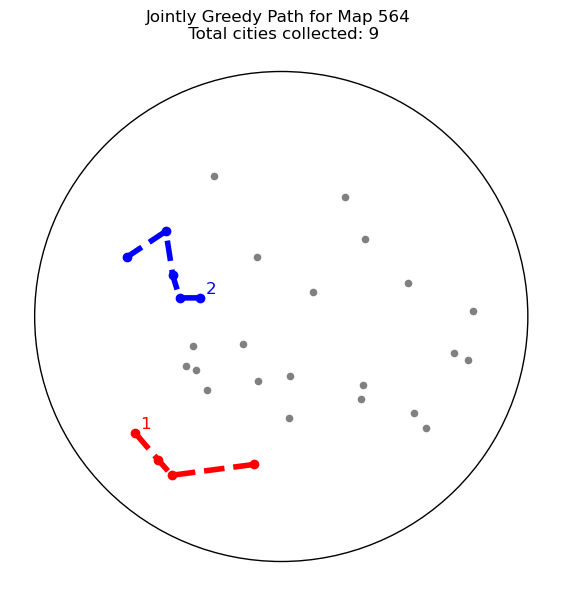

Total number of cities caught:  9


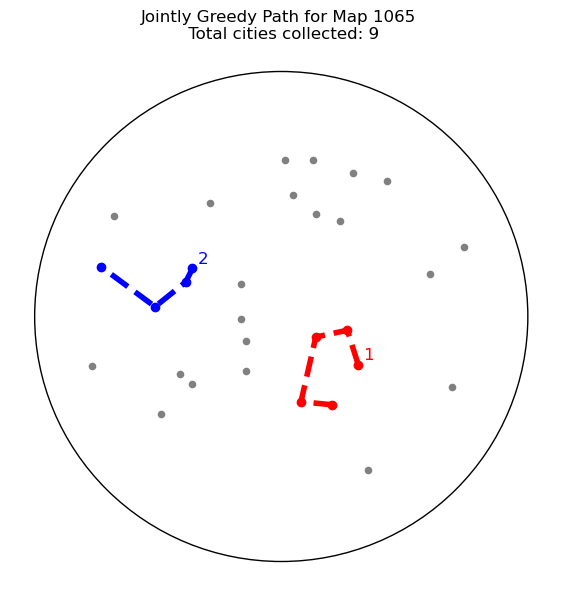

Total number of cities caught:  12


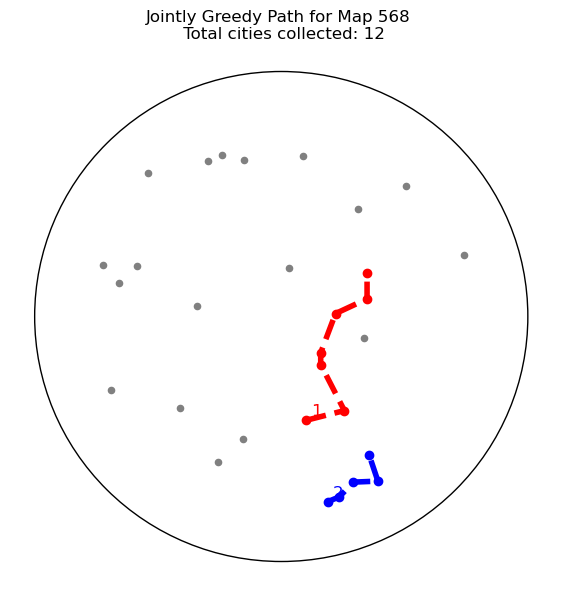

Total number of cities caught:  9


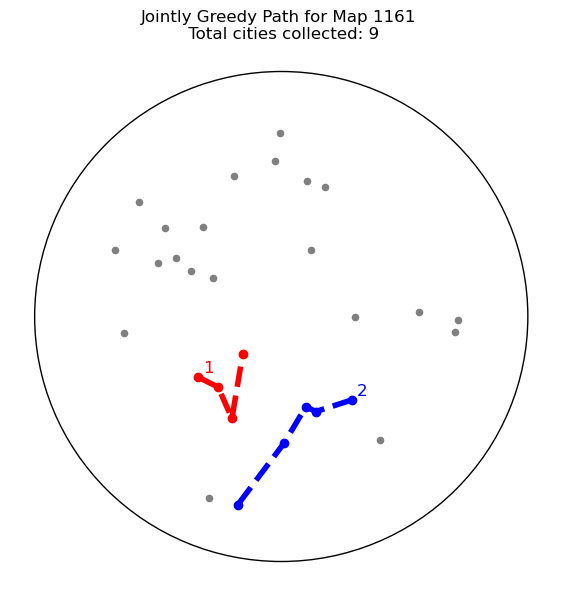

Total number of cities caught:  9


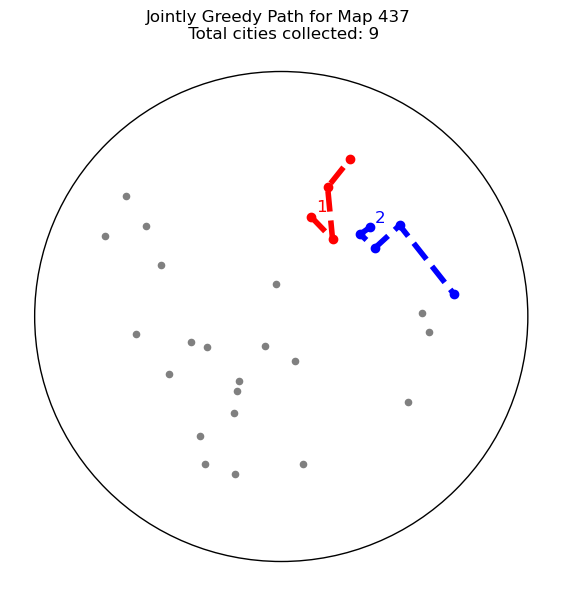

Total number of cities caught:  9


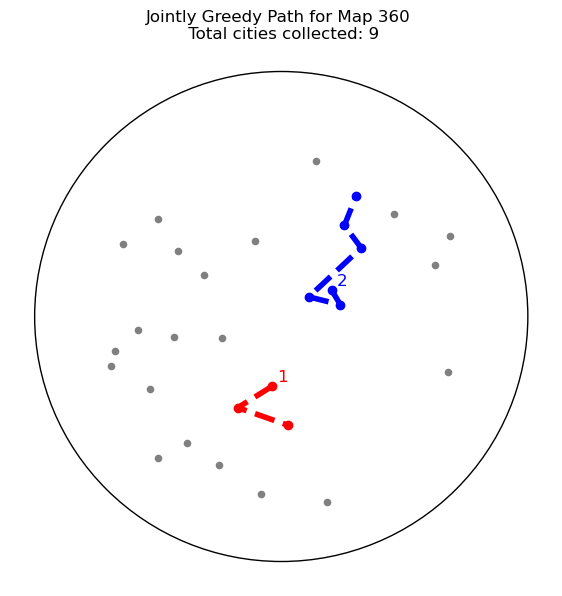

Total number of cities caught:  9


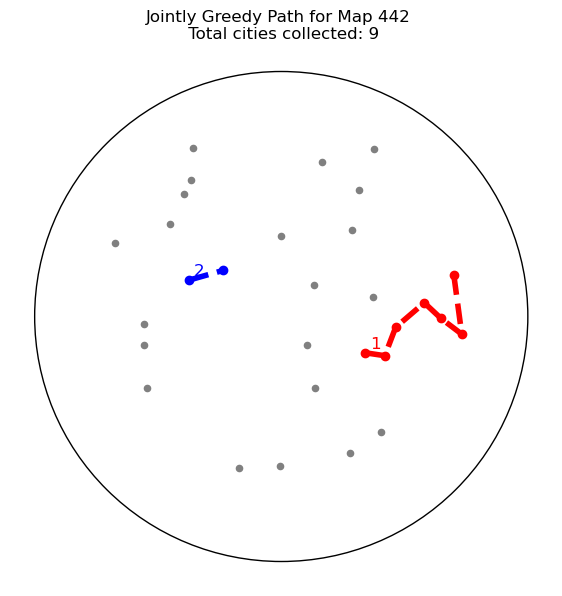

Total number of cities caught:  10


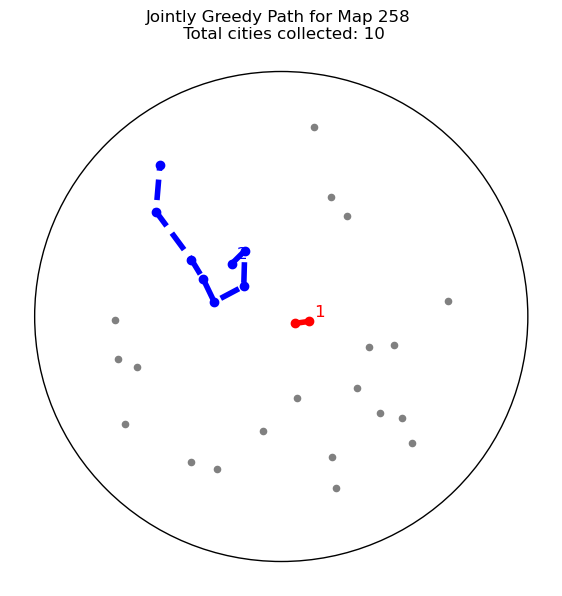

Total number of cities caught:  10


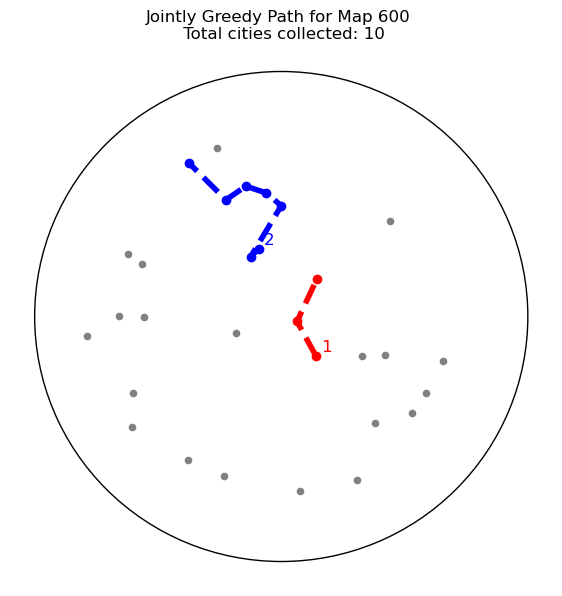

Total number of cities caught:  9


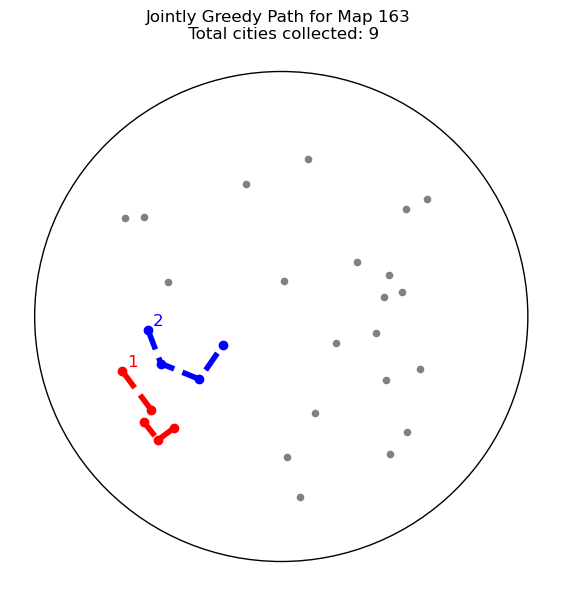

Total number of cities caught:  9


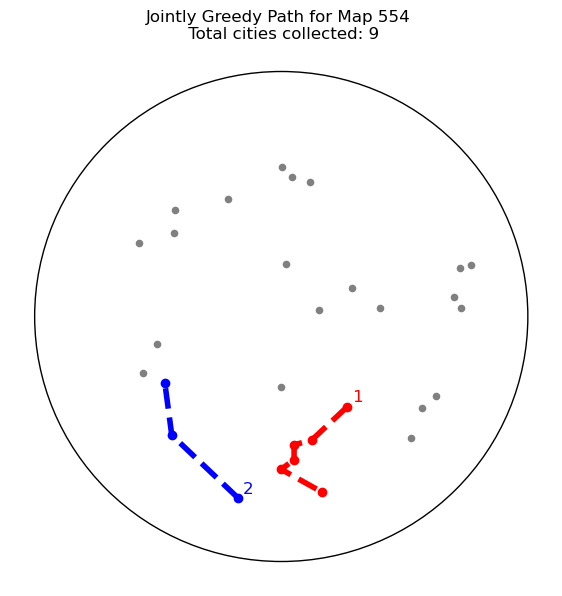

Total number of cities caught:  10


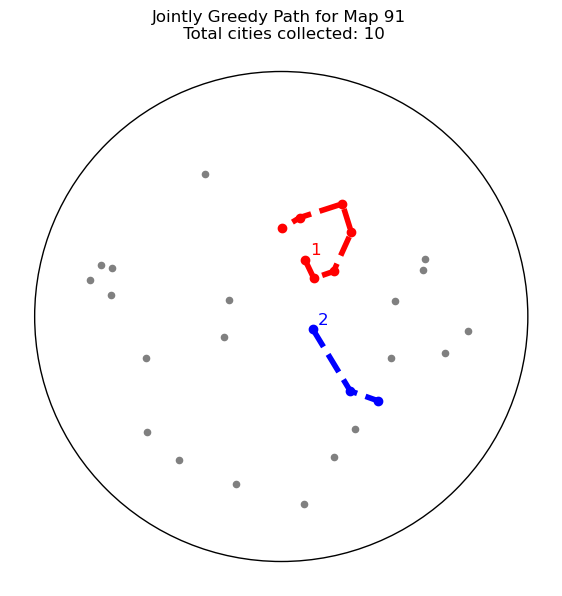

Total number of cities caught:  11


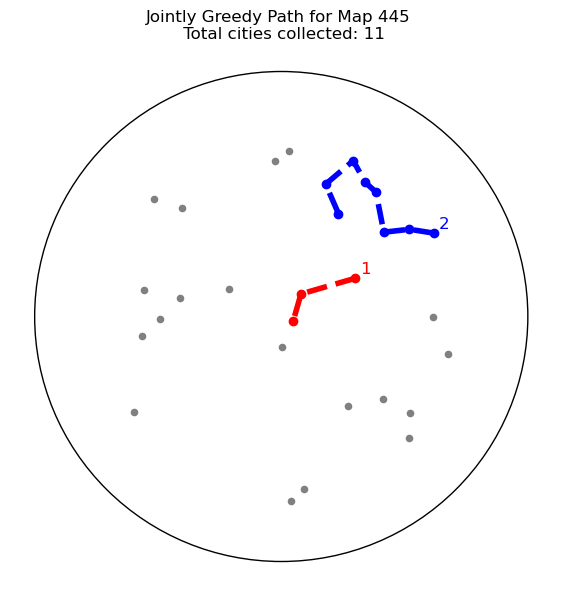

Total number of cities caught:  9


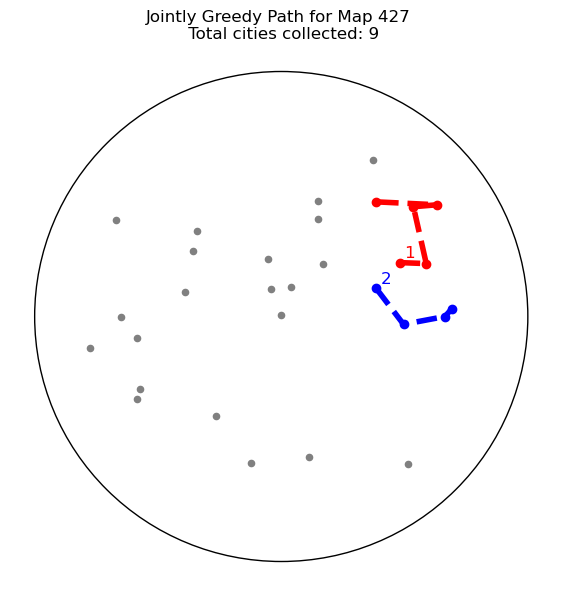

Total number of cities caught:  8


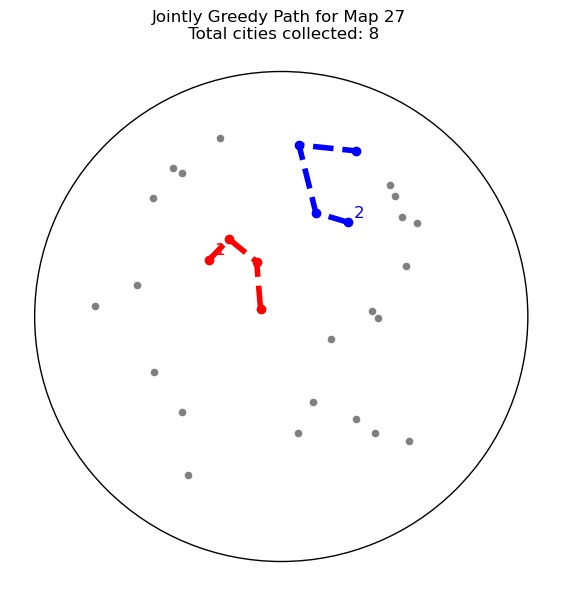

Total number of cities caught:  11


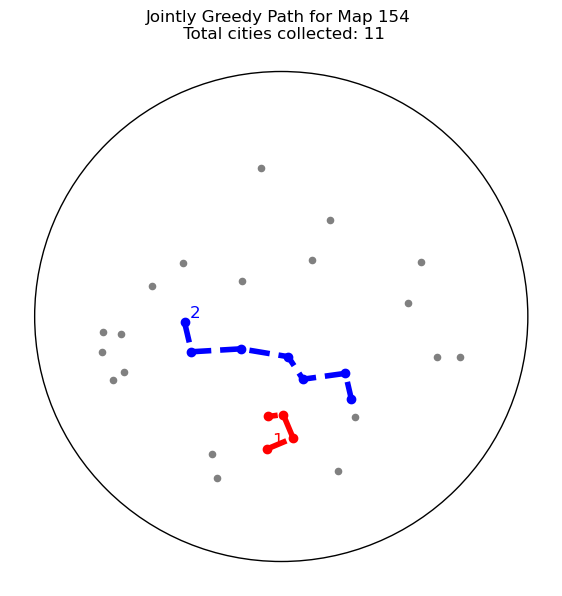

Total number of cities caught:  9


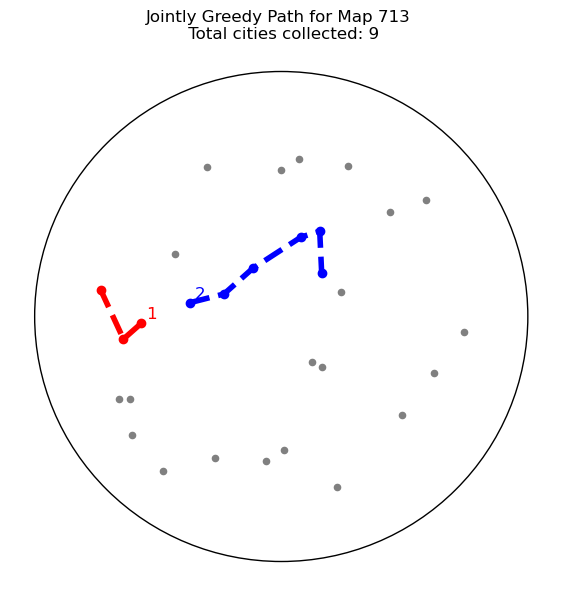

Total number of cities caught:  10


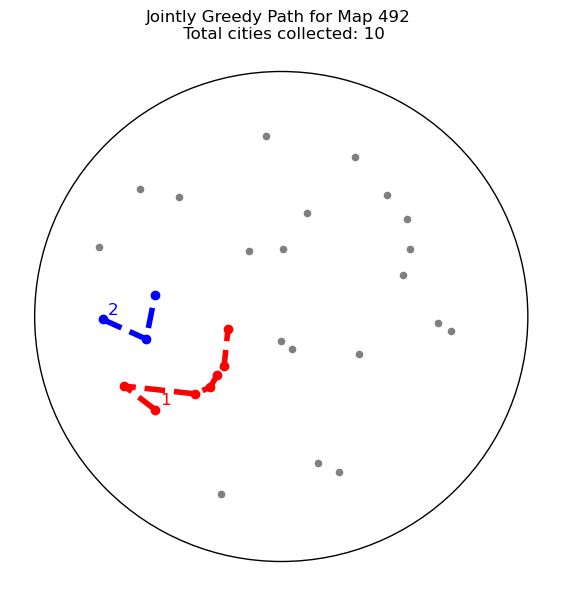

Total number of cities caught:  11


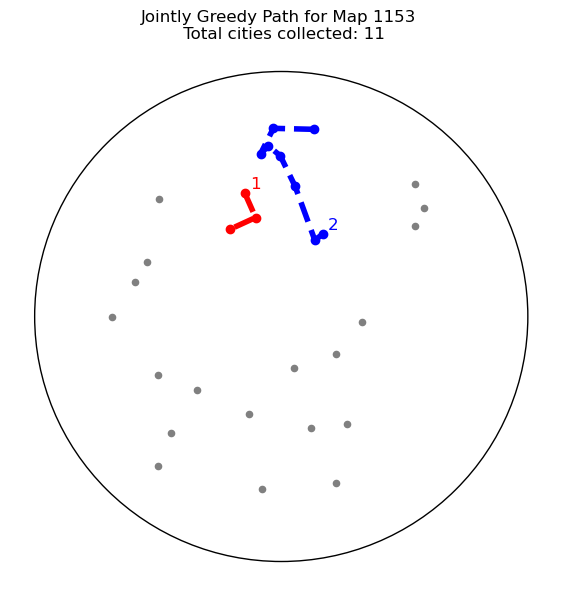

Total number of cities caught:  10


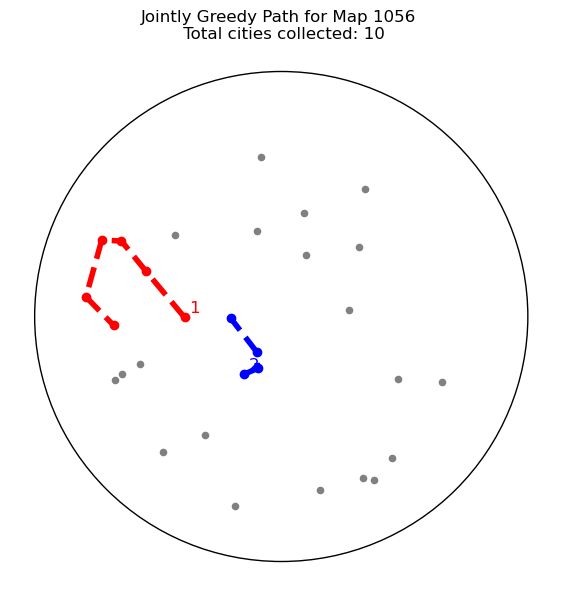

Total number of cities caught:  9


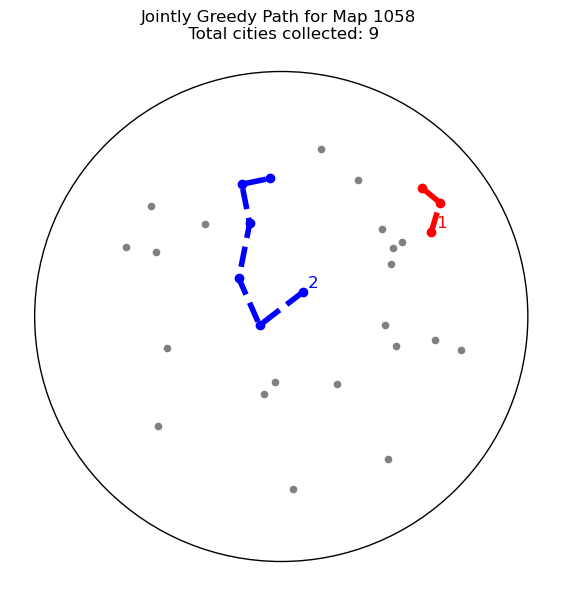

Total number of cities caught:  7


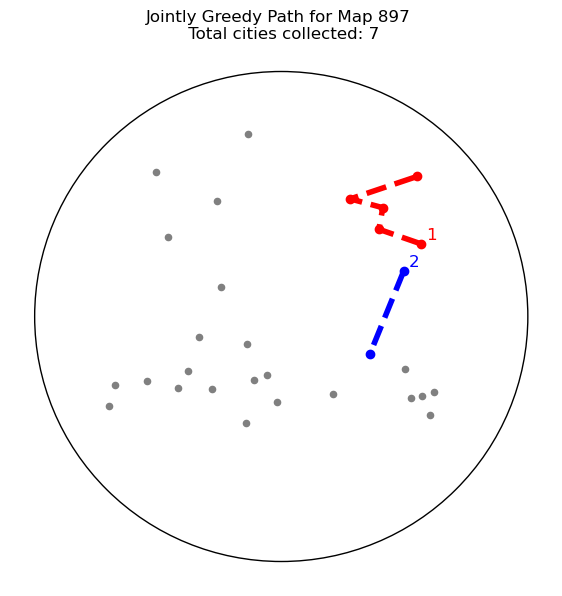

Total number of cities caught:  6


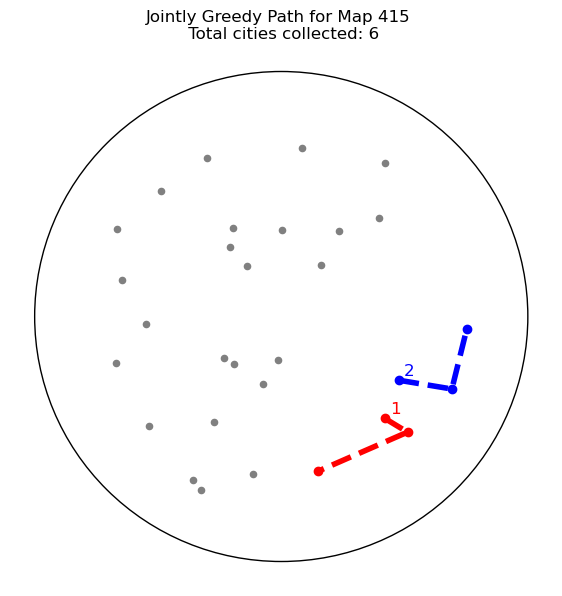

Total number of cities caught:  10


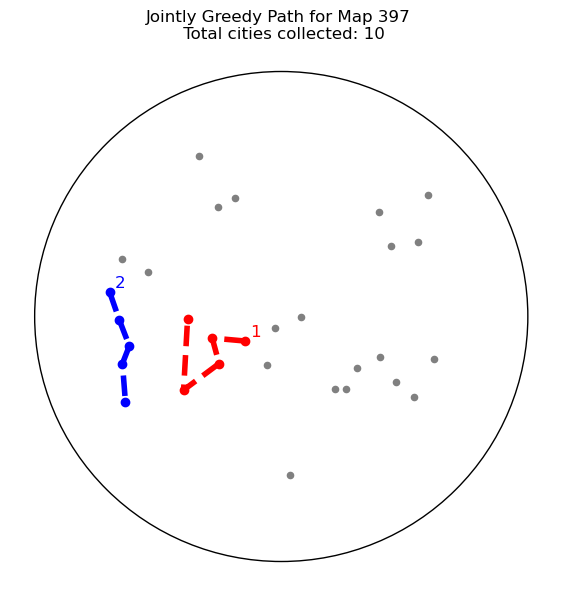

Total number of cities caught:  8


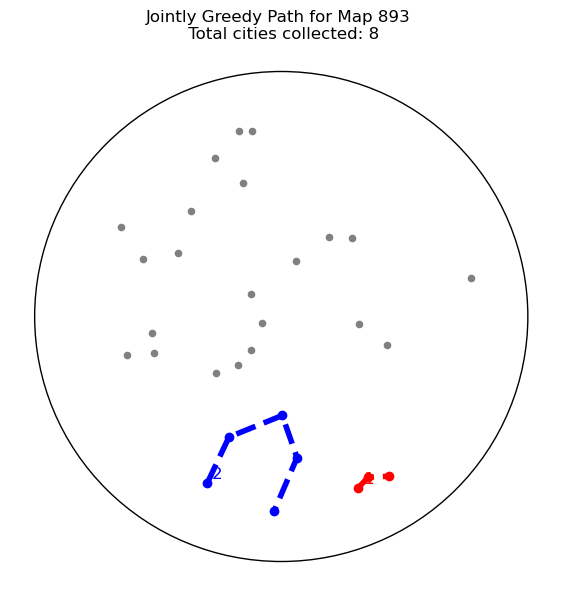

Total number of cities caught:  10


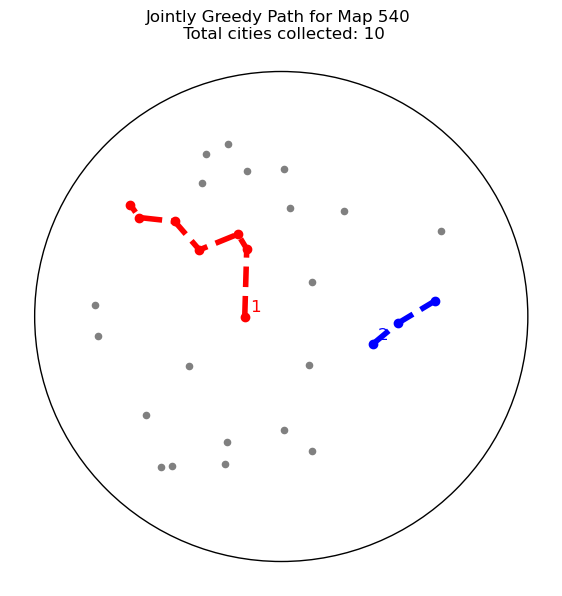

Total number of cities caught:  9


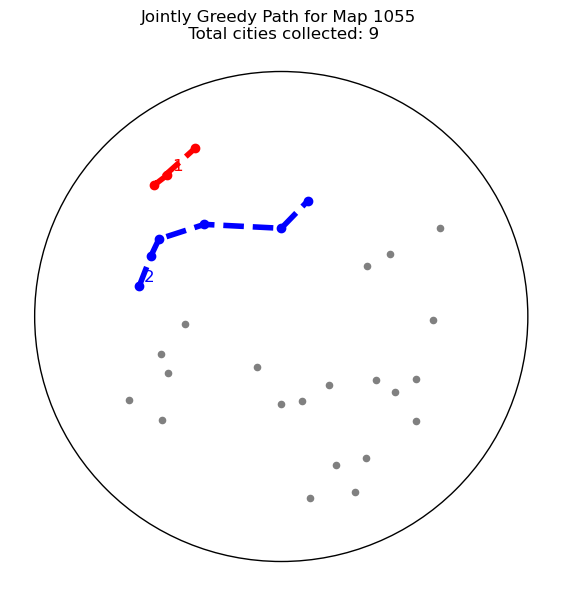

Total number of cities caught:  9


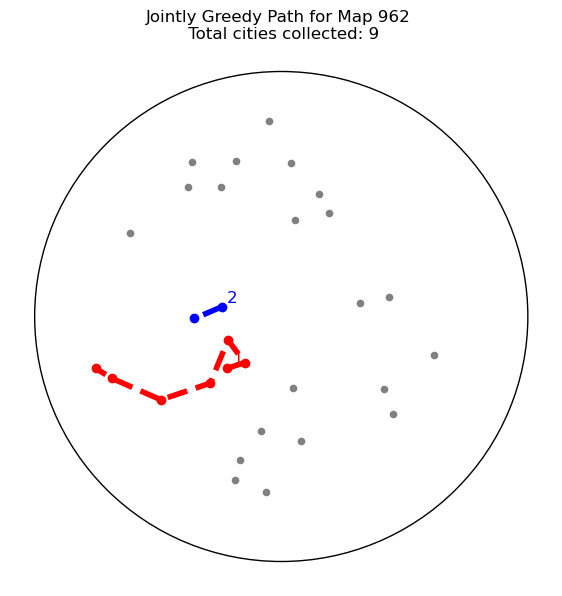

Total number of cities caught:  9


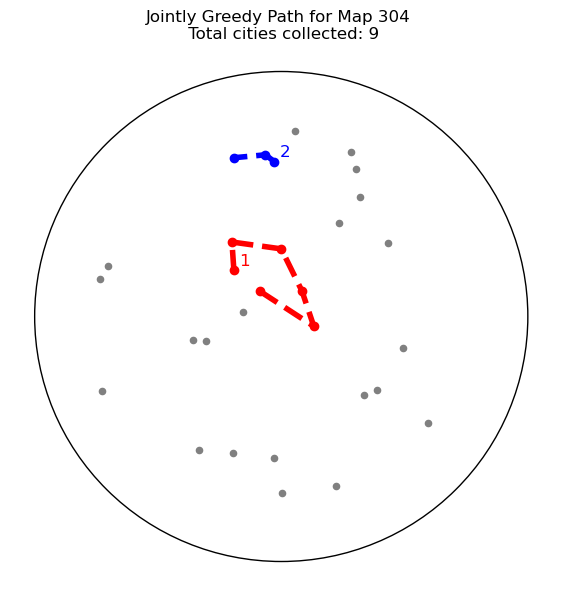

Total number of cities caught:  8


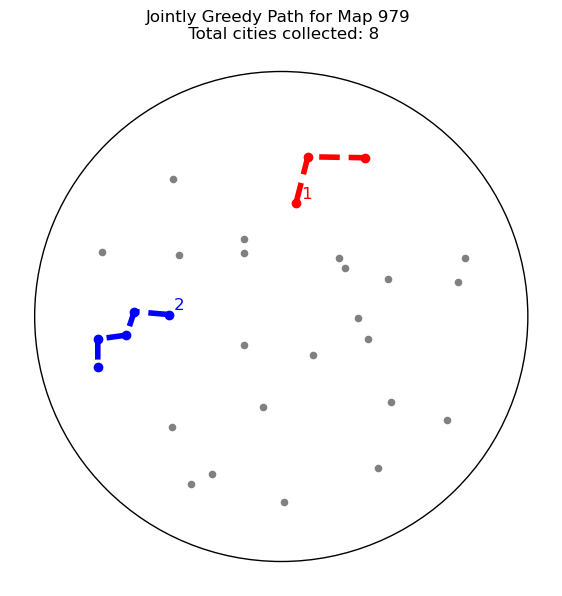

Total number of cities caught:  9


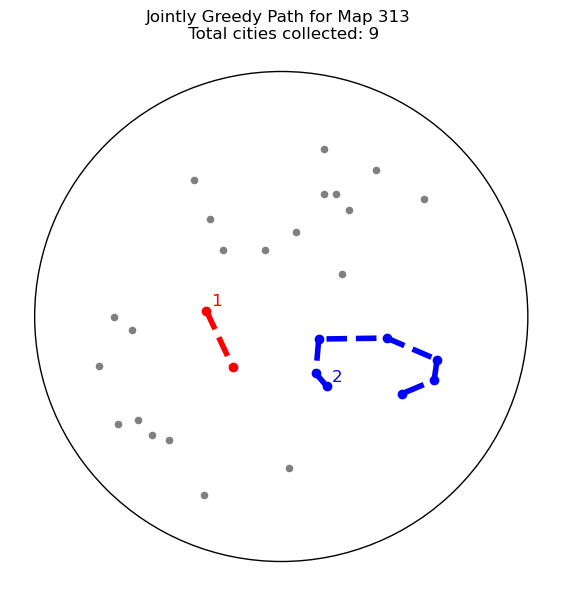

Total number of cities caught:  8


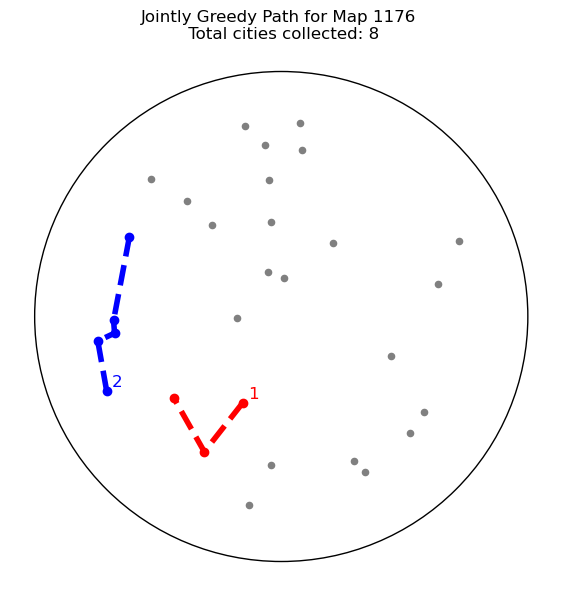

Total number of cities caught:  10


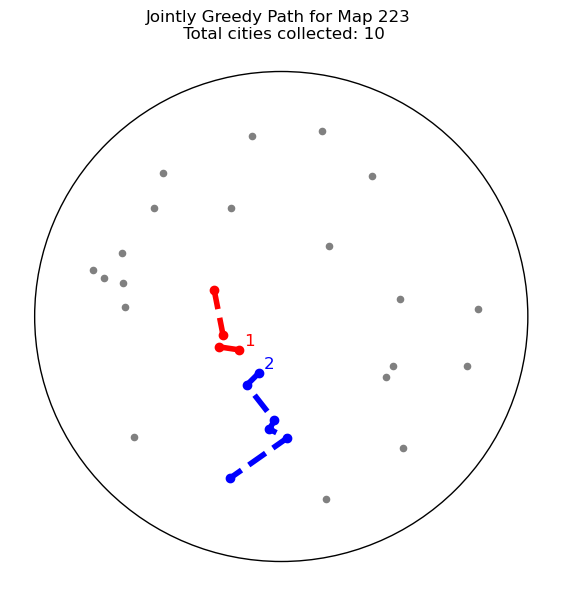

Total number of cities caught:  11


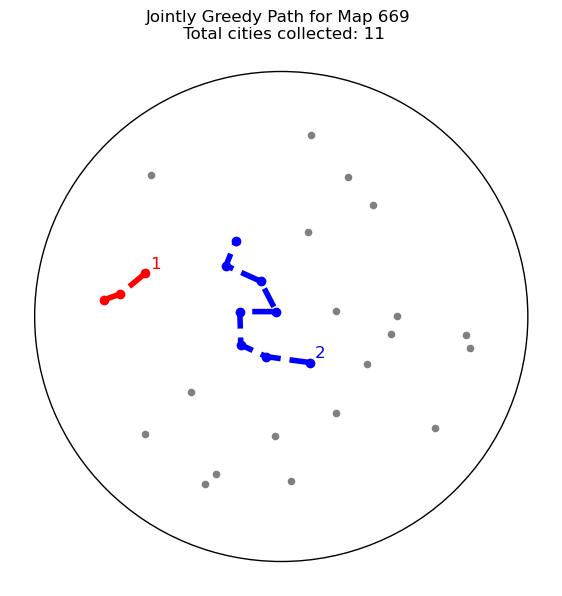

Total number of cities caught:  9


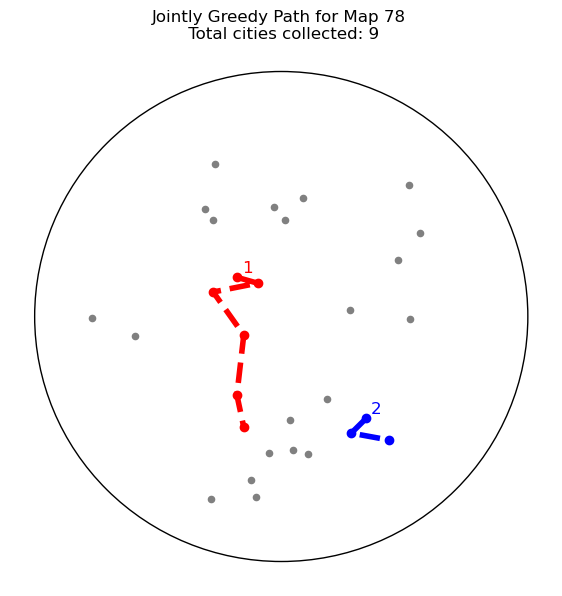

Total number of cities caught:  8


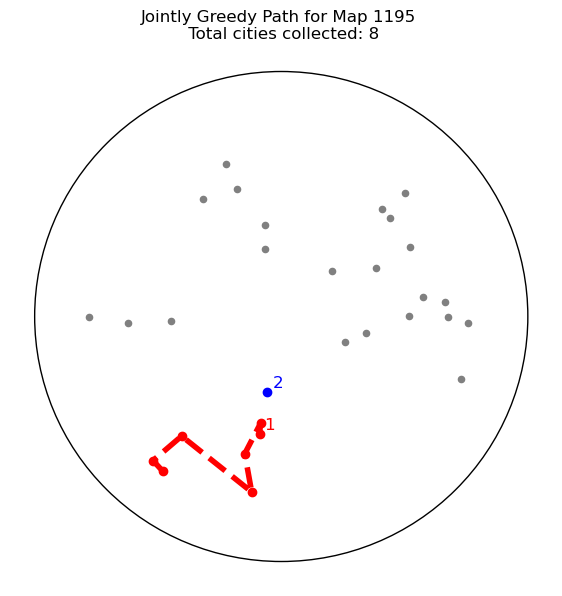

Total number of cities caught:  9


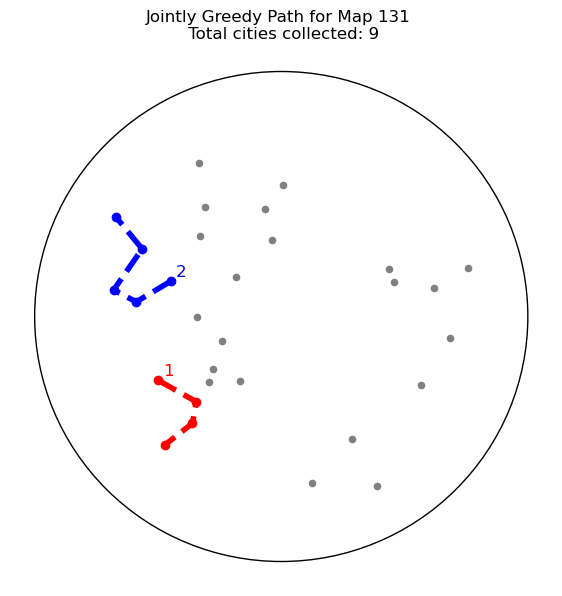

Total number of cities caught:  10


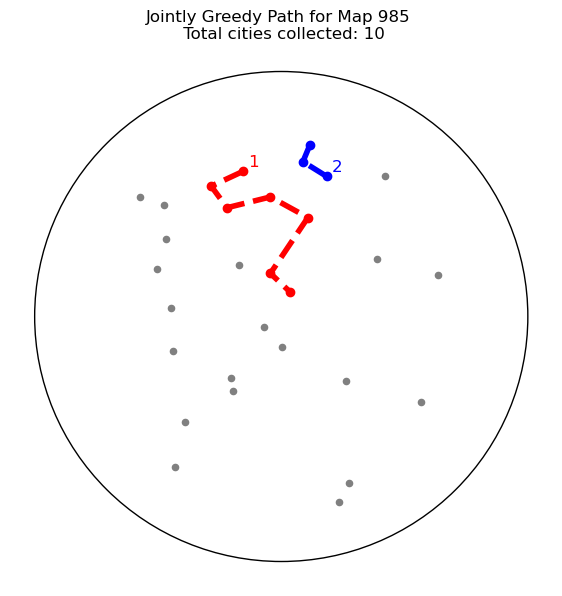

Total number of cities caught:  9


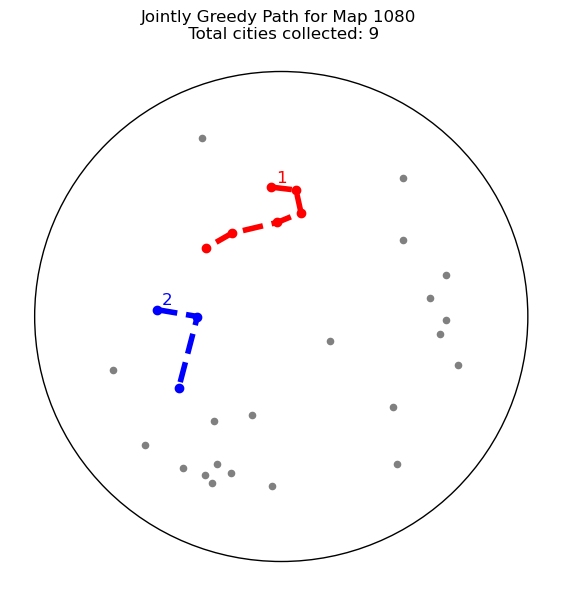

Total number of cities caught:  7


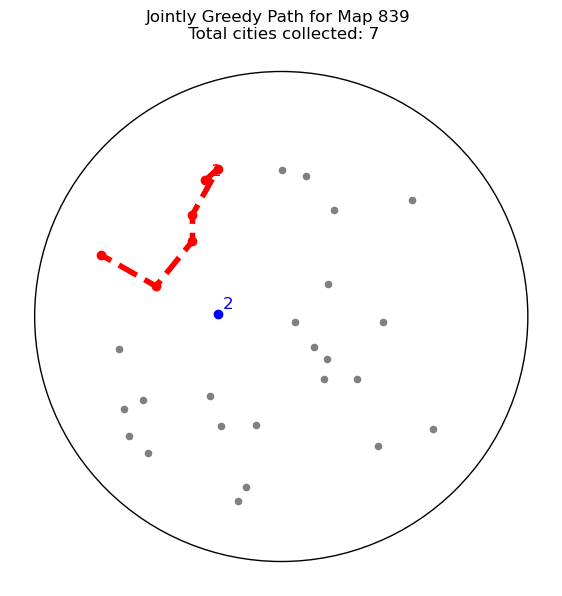

Total number of cities caught:  9


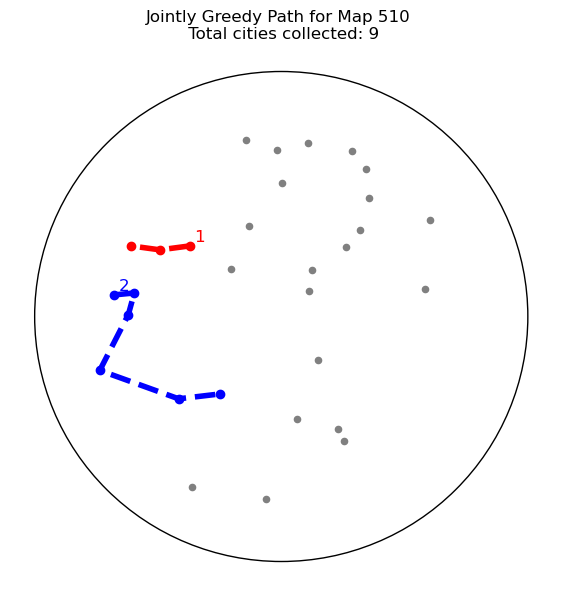

Total number of cities caught:  10


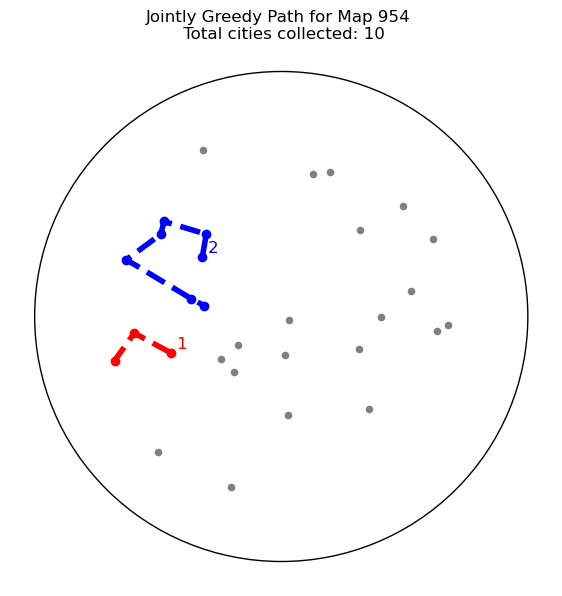

In [14]:
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt

# List of indices to process
indices = [70, 15, 1137, 883, 627, 1095, 444, 823, 432, 574, 994, 644, 812, 616, 674, 1191, 141, 945, 564, 1065, 568, 1161, 437, 360, 442, 258, 600, 163, 554, 91, 445, 427, 27, 154, 713, 492, 1153, 1056, 1058, 897, 415, 397, 893, 540, 1055, 962, 304, 979, 313, 1176, 223, 669, 78, 1195, 131, 985, 1080, 839, 510, 954]

# Loop through each index
for ind in indices:
    # Create an instance of circle_map for the current index
    mmap = circle_map()  # Uses the current `ind` in its __init__
    
    # Get starting points for the current index
    start_1 = greedy1_list[ind][0]
    start_2 = greedy2_list[ind][0]
    
    # Compute paths
    n_greedy1, greedy_index1, n_greedy2, greedy_index2, remainingBudget = jointlyGreedy(mmap, start_1, start_2)
    
    # Plot results for this index
    PlotJointlyGreedy(greedy_index1, greedy_index2, basic_all, ind)
    

Total number of cities caught:  9


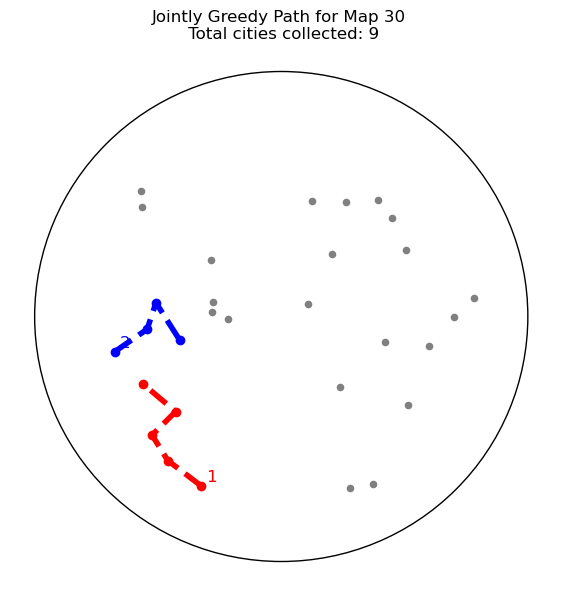

Total number of cities caught:  9


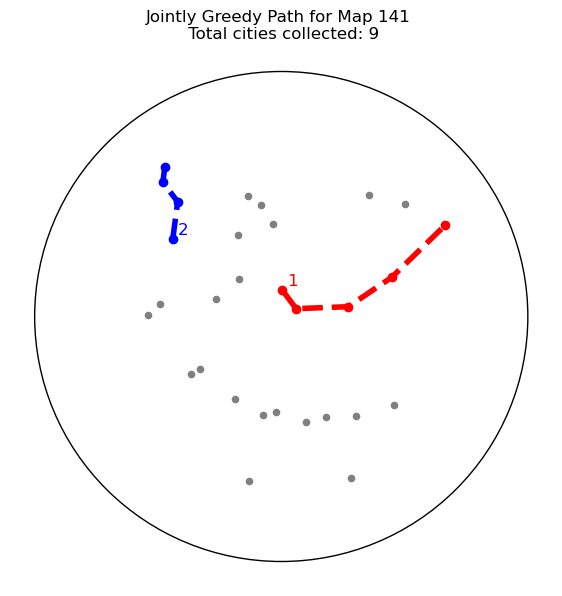

Total number of cities caught:  9


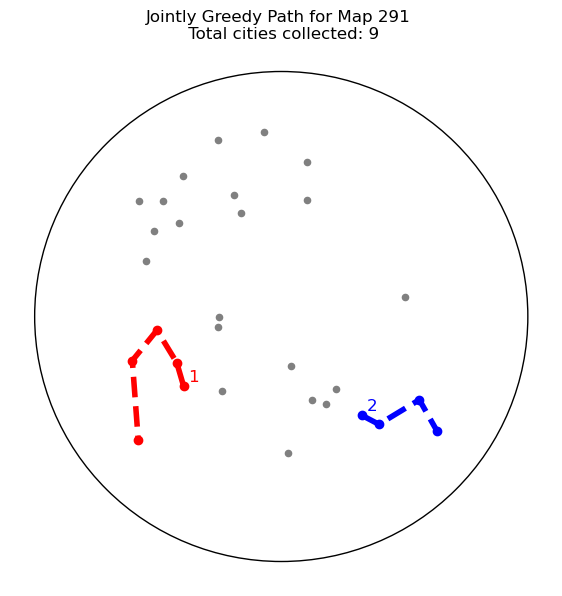

Total number of cities caught:  8


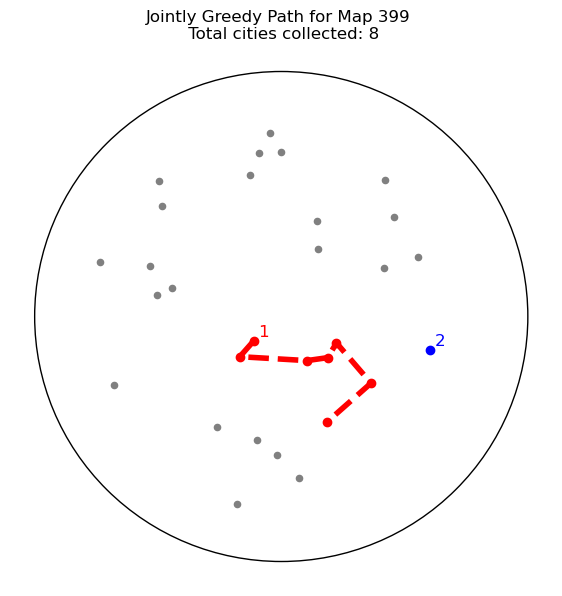

Total number of cities caught:  8


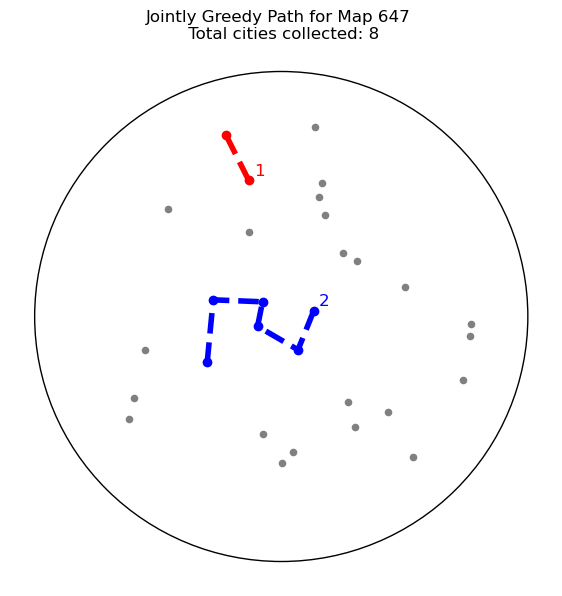

Total number of cities caught:  9


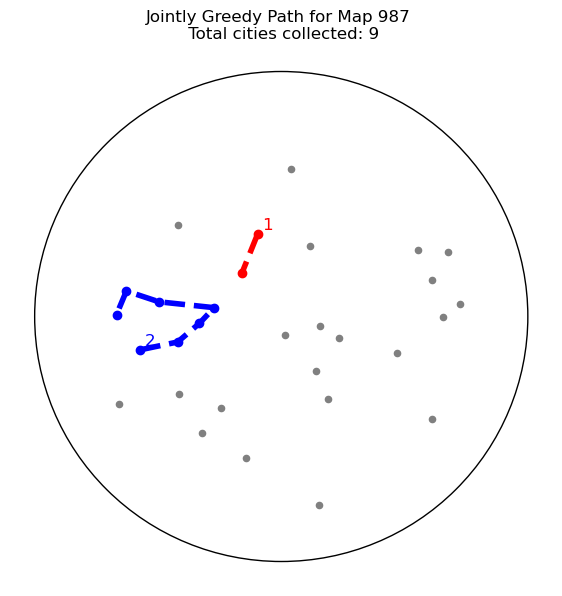

Total number of cities caught:  9


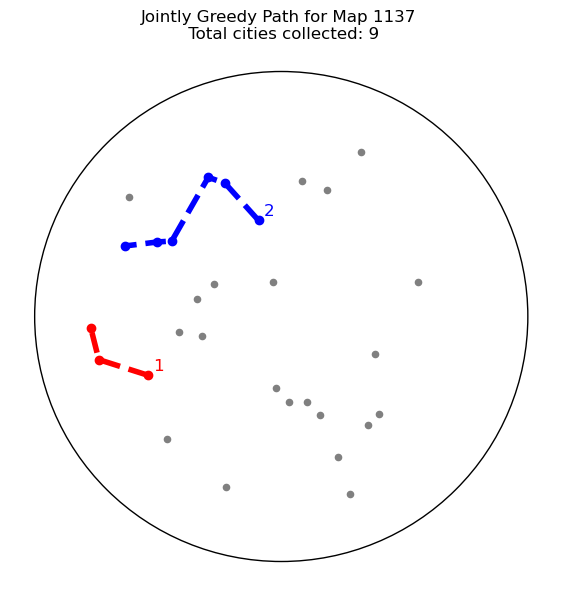

In [13]:
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt

# List of indices to process
indices = [30, 141, 291, 399, 647, 987, 1137]

# Create a Word document
doc = Document()

# Loop through each index
for ind in indices:
    # Create an instance of circle_map for the current index
    mmap = circle_map()  # Uses the current `ind` in its __init__
    
    # Get starting points for the current index
    start_1 = greedy1_list[ind][0]
    start_2 = greedy2_list[ind][0]
    
    # Compute paths
    n_greedy1, greedy_index1, n_greedy2, greedy_index2, remainingBudget = jointlyGreedy(mmap, start_1, start_2)
    
    # Plot results for this index
    PlotJointlyGreedy(greedy_index1, greedy_index2, basic_all, ind)
    
    # Save the figure to a temporary image file
    image_path = f"figure_{ind}.png"
    plt.savefig(image_path, bbox_inches='tight', dpi=300)
    plt.close()  # Close the figure to free up memory
    
    # Add the image to the Word document
    doc.add_heading(f"Figure for Index {ind}", level=1)
    doc.add_picture(image_path, width=Inches(6))  # Adjust width as needed
    doc.add_page_break()  # Add a page break after each figure

# Save the Word document
doc.save("generated_figures.docx")

P1xJG: [-99, -106, -126, -151, -145]
P1yJG: [-71, -47, -14, -45, -126]
P2xJG: [82, 99, 140, 158]
P2yJG: [-101, -110, -85, -117]
Total number of cities caught:  9


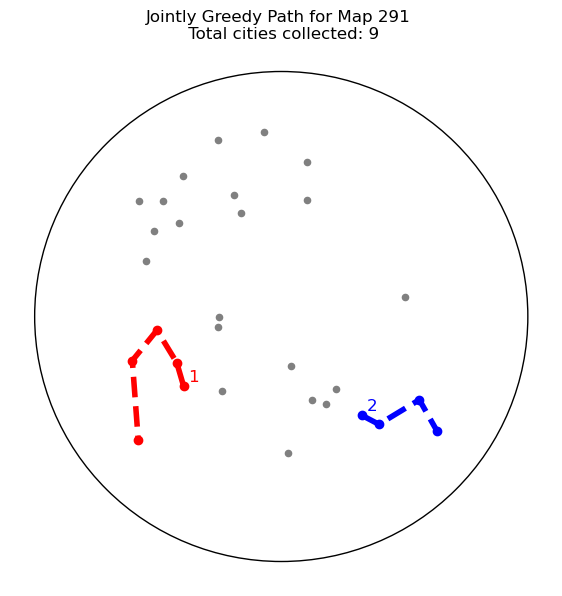

In [6]:
# Example usage for a specific map index
ind = 291

class circle_map:
    def __init__(self):
        self.N = 30
        self.total = 150
        self.R = 200 * 200
        self.x = basic_all[ind].get("x")
        self.y = basic_all[ind].get("y")
        self.xy = [(self.x[i], self.y[i]) for i in range(0, len(self.x))]
        self.city_start1 = self.xy[0]
        self.distance = distance_matrix(self.xy, self.xy, p=2, threshold=10000)

# Create an instance of circle_map
mmap = circle_map()

# Use the same starting points as the greedy model
start_1 = greedy1_list[ind][0]  # First player's starting point
start_2 = greedy2_list[ind][0]  # Second player's starting point

# Call jointlyGreedy
n_greedy1, greedy_index1, n_greedy2, greedy_index2, remainingBudget = jointlyGreedy(mmap, start_1, start_2)


# Visualize jointlyGreedy paths
PlotJointlyGreedy(greedy_index1, greedy_index2, basic_all, ind)


Total number of cities caught:  9


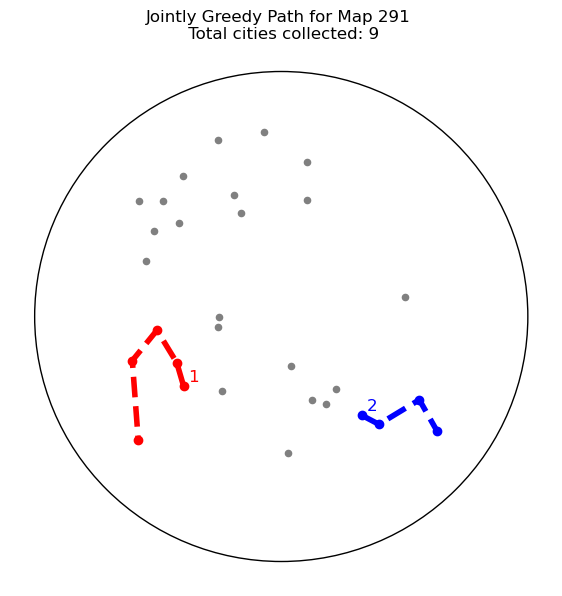

Saved figure to: figure_291.png
Total number of cities caught:  11


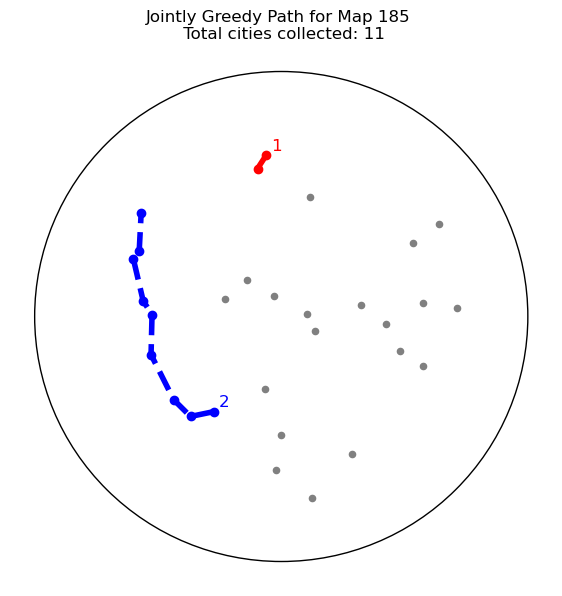

Saved figure to: figure_185.png
Total number of cities caught:  8


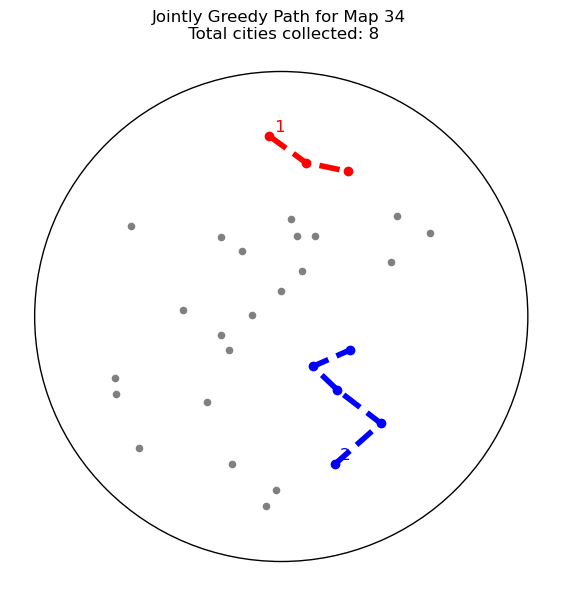

Saved figure to: figure_34.png
Word document saved successfully.


In [11]:
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt

# List of indices to process
indices = [30, 141, 291, 399, 647, 987, 1137]

# Create a Word document
#ndoc = Document()

# Loop through each index
for ind in indices:
    # Create an instance of circle_map for the current index
    mmap = circle_map()  # Uses the current `ind` in its __init__
    
    # Get starting points for the current index
    start_1 = greedy1_list[ind][0]
    start_2 = greedy2_list[ind][0]
    
    # Compute paths
    n_greedy1, greedy_index1, n_greedy2, greedy_index2, remainingBudget = jointlyGreedy(mmap, start_1, start_2)
    
    # Plot results for this index
    PlotJointlyGreedy(greedy_index1, greedy_index2, basic_all, ind)
    
    # Debugging: Show the figure to verify it is correct
    plt.show()
    
    # Save the figure to a temporary image file
    image_path = f"figure_{ind}.png"
    plt.savefig(image_path, bbox_inches='tight', dpi=300)
    plt.close()  # Close the figure to free up memory
    
    # Debugging: Print the path to confirm the file is saved
    print(f"Saved figure to: {image_path}")
    
    # Add the image to the Word document
    doc.add_heading(f"Figure for Index {ind}", level=1)
    doc.add_picture(image_path, width=Inches(6))  # Adjust width as needed
    doc.add_page_break()  # Add a page break after each figure

# Save the Word document
doc.save("generated_figures.docx")
print("Word document saved successfully.")